<a href="https://colab.research.google.com/github/VMaltaL/VMaltaL/blob/main/igrf_Victoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudos do IGRF

Objetivos:

* Gerar mapas de Bx, By, Bz, I, D para o dia atual (2023-11-07)

* Gerar mapas de |B| (se quiserem façam I e D também) para os últimos 50 anos

* Descrever as principais características do campo observadas nos dados, incluindo a variação temporal.

Dicas:
1. Jeito menos complexo é gerar um cubo de dados com as datas que quiserem
1. Usem a função `numpy.arctan2`
1. Se quiser incluir as linhas de costa no mapa, usar [PyGMT](https://www.pygmt.org/latest/)
1. Usar céluas de texto para fazer a descrição acima e fazer anotações do que o código está fazendo

#IGRF - International Geomagnetic Reference Field (IAGA)

https://www.ncei.noaa.gov/products/international-geomagnetic-reference-field


Biblioteca
Pure Python code to calculate IGRF model predictions. The IGRF is a model of the Earth's main magnetic field that is updated every 5 years. See https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html for details and https://doi.org/10.1186/s40623-020-01163-9 for even more details.
The code is vectorized, so calculations should be pretty fast.
https://github.com/klaundal/ppigrf


##Instalar pacotes necessários
O comando `pip` instalas os pacotes do Python. Use o ! para rodar no terminal e não no Python.

In [ ]:
!pip install condacolab

  Using cached condacolab-0.1.7-py3-none-any.whl (7.2 kB)


In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!mamba install pygmt

In [ ]:
!pip install ppigrf verde


#subplot para plotar tudo numa mesma imagem
#https://matplotlib.org/stable/users/explain/animations/animations.html#animations

#Importa bibliotecas

In [ ]:
import ppigrf
import datetime
import verde as vd
import matplotlib.pyplot as plt
import numpy as np
import pygmt

#Calcula datas de 5 em 5 anos

In [ ]:
dates = []
for i in range (1968, 2024, 5):
    newdate = datetime.datetime(i,11,7)
    dates.append(newdate)

In [ ]:
longitude, latitude = vd.grid_coordinates(region=[-180,180,-90,90], spacing=1)
bx = []
by = []
bz = []
b = []
Bxyz = []
for i in range (len(dates)):
    b = ppigrf.igrf(longitude, latitude, 0, dates[i])
    bx.append(b[0])
    by.append(b[1])
    bz.append(b[2])
    Bxyz.append(b)


print(len(dates))

/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \
/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \
/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \
/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \
/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \
/usr/local/lib/python3.10/site-packages/ppigr

12


/usr/local/lib/python3.10/site-packages/ppigrf/ppigrf.py:530: RuntimeWarning: invalid value encountered in divide
  G  = -(RE / r) ** (nn + 1) * mm * np.hstack((-P * sinmphi, P * cosmphi)) \


#Calcula campo magnético absoluto, declinação e inclinação de cada ponto para cada data

In [ ]:
D = []
I = []
B = []
for i in range (len(dates)):
    norm_b = np.sqrt(bx[i][0]**2 + by[i][0]**2 +bz[i][0]**2)
    B.append(norm_b)
    calculate_I = np.arcsin(bz[i][0]/norm_b)
    I.append(calculate_I)
    calculate_D = np.arctan2(by[i][0],bx[i][0])
    D.append(calculate_D)

#Sobre as escalas
Melhores escalar de cores para esse tipo de dado deve variar uniformemente e ser bimodal, duas cores para resaltar o 0.

O "_r" na escala inverte o negativo e positivo.
O vmax e vmin centra o 0 no branco.

#Mapas de campo magnético em X - 2023

Text(0.5, 1.0, 'Campo magnético da Terra atualmente em x (nT)')

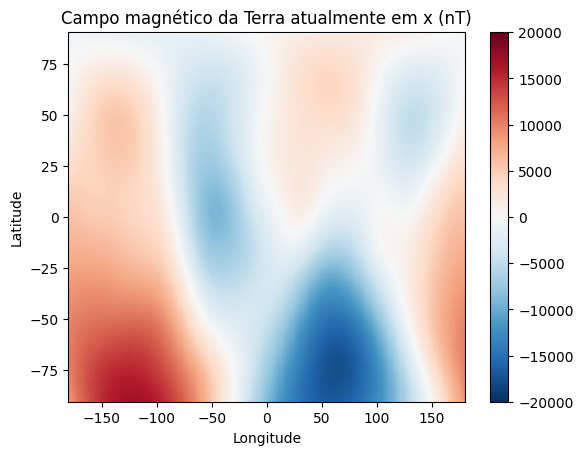

In [ ]:
plt.pcolormesh(longitude, latitude, bx[len(bx)-1][0], cmap="RdBu_r", vmax=20000, vmin=-20000)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Campo magnético da Terra atualmente em x (nT)")

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


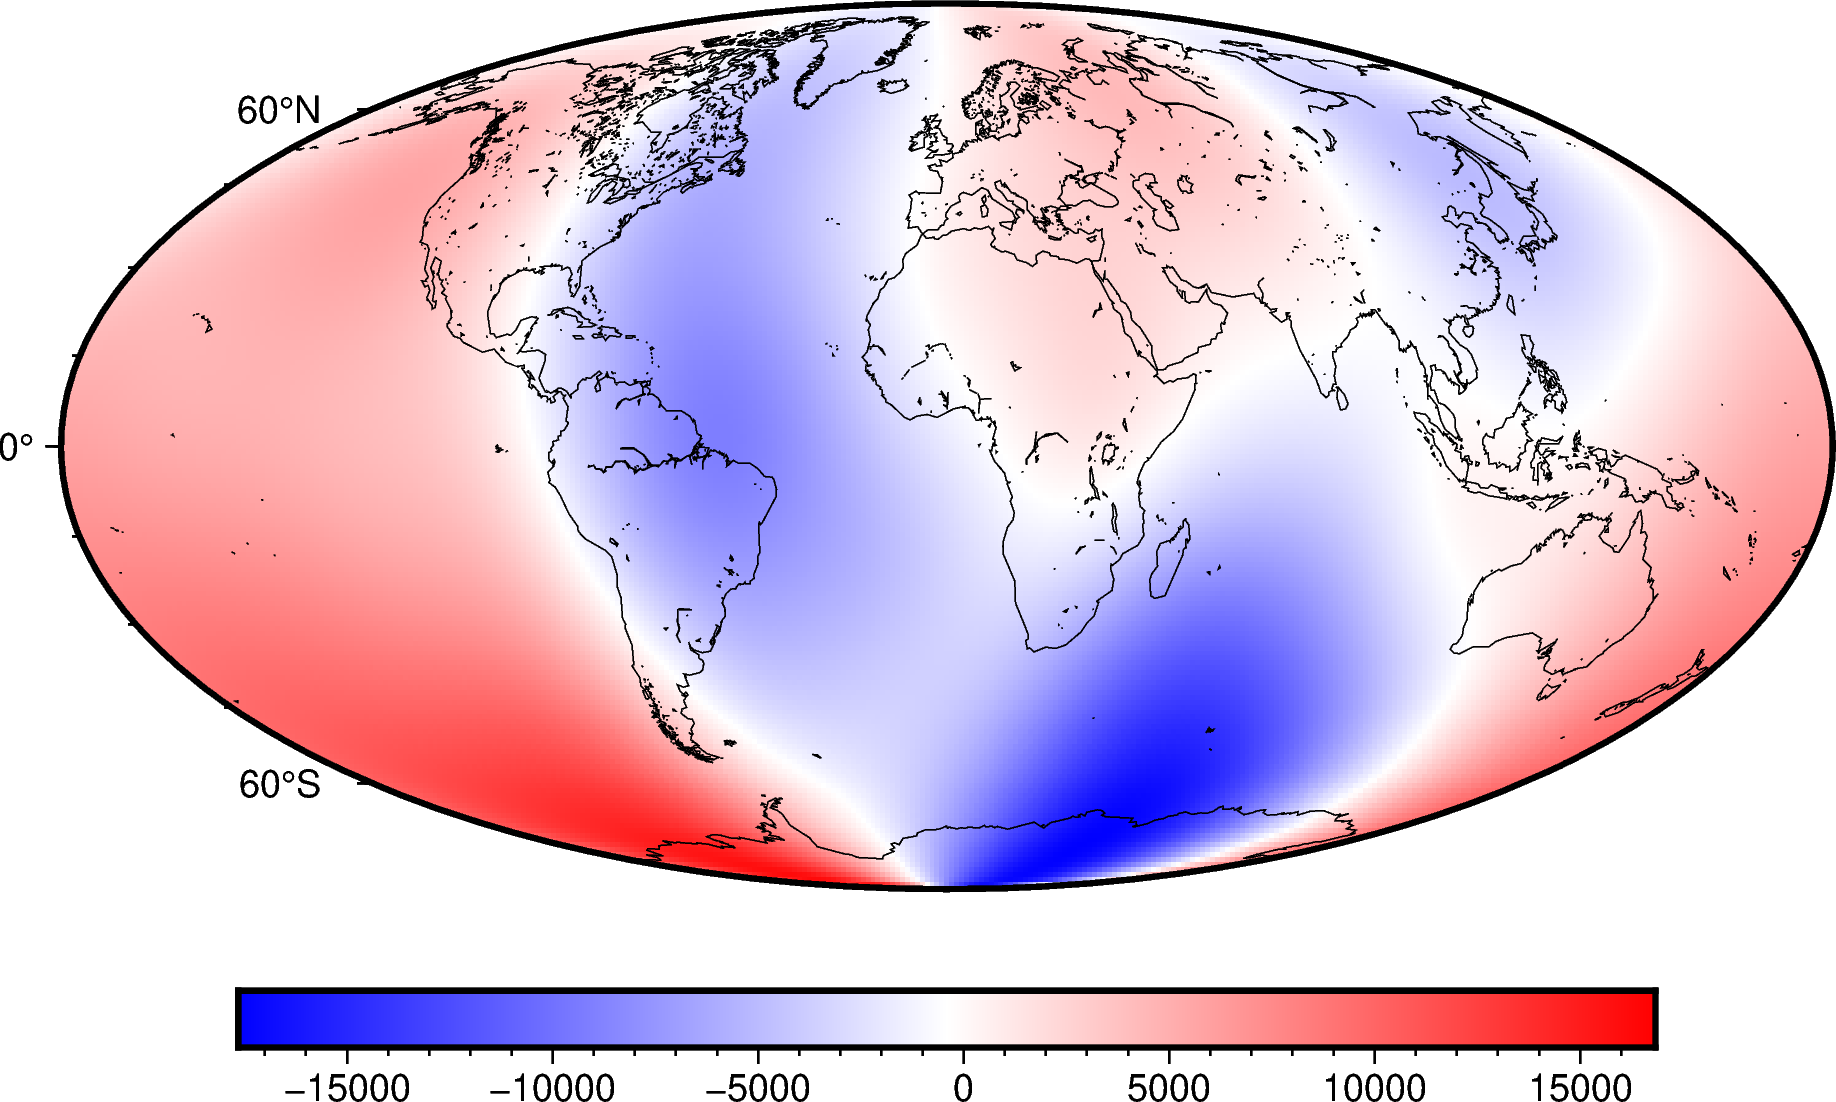

In [ ]:
grid = vd.make_xarray_grid((longitude, latitude), bx[len(bx)-1][0], data_names="bx")
grid
fig = pygmt.Figure()
fig.grdimage(grid.bx, cmap="polar+h", frame='af', projection="W15c")
fig.colorbar()
fig.coast(shorelines=True)
fig.show()

#Mapas de campo magnético em Y - 2023

Text(0.5, 1.0, 'Campo magnético da Terra atualmente em y (nT)')

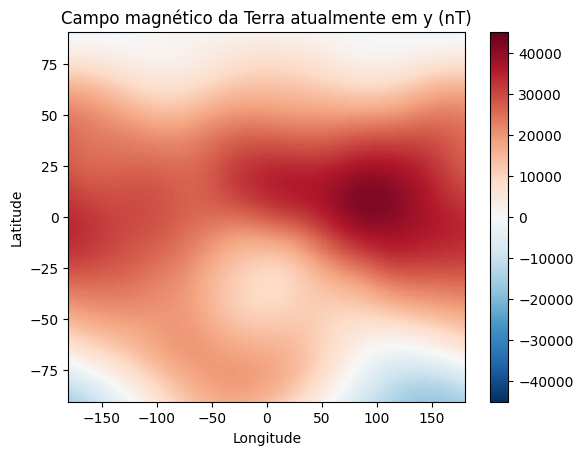

In [ ]:
plt.pcolormesh(longitude, latitude, by[len(by)-1][0], cmap="RdBu_r", vmax=45000, vmin=-45000)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Campo magnético da Terra atualmente em y (nT)")

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


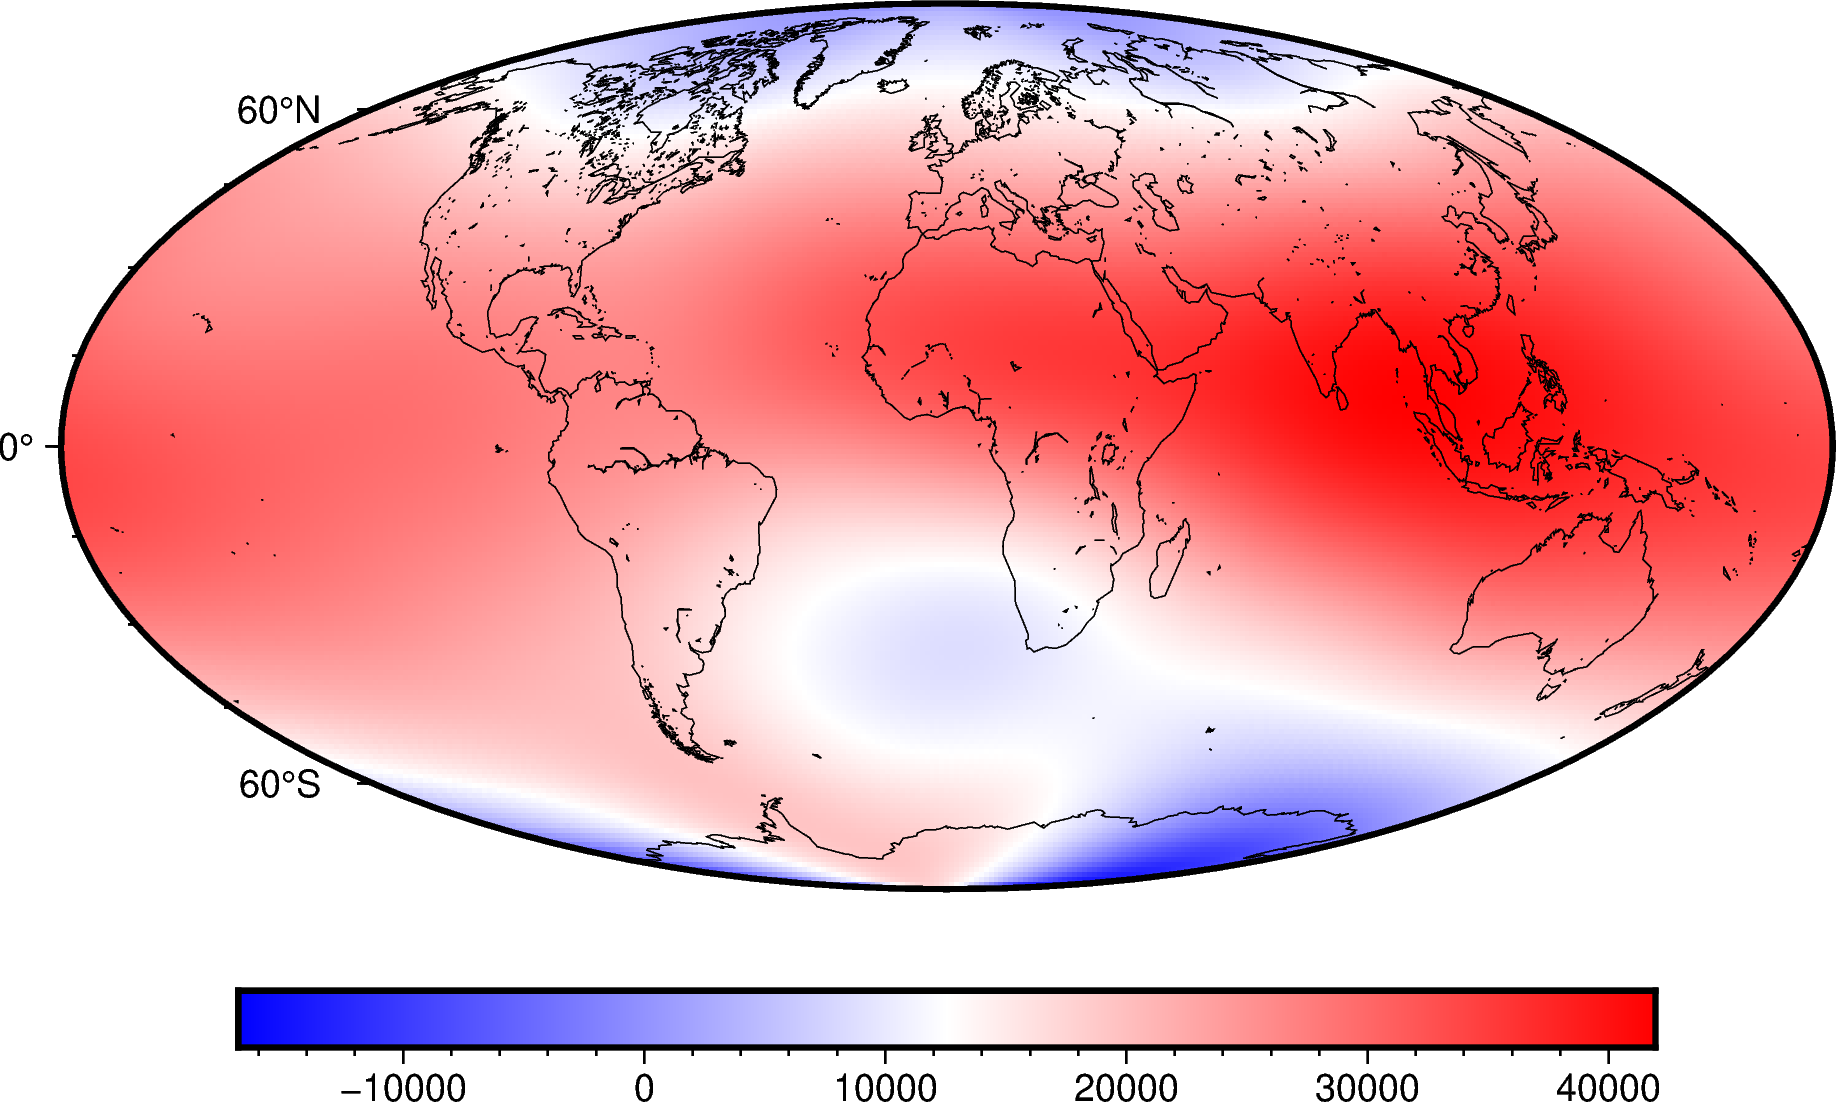

In [ ]:
grid = vd.make_xarray_grid((longitude,latitude), by[len(by)-1][0],data_names="by")
grid
fig = pygmt.Figure()
fig.grdimage(grid.by, cmap="polar+h", frame="af", projection="W15c")
fig.colorbar()
fig.coast(shorelines=True)
fig.show()

#Mapas de campo magnético em Z - 2023

Text(0.5, 1.0, 'Campo magnético da Terra atualmente em z (nT)')

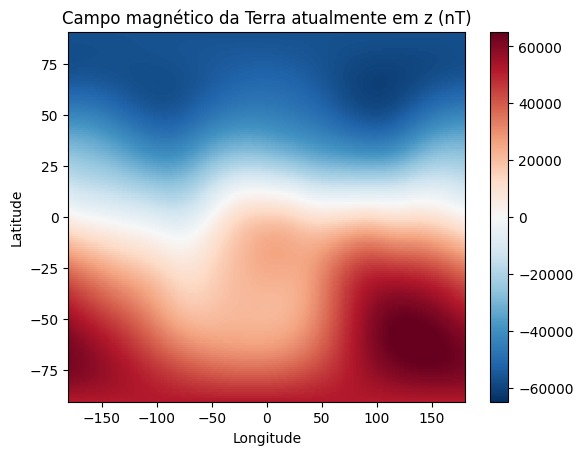

In [ ]:
plt.pcolormesh(longitude, latitude, bz[len(bz)-1][0], cmap="RdBu_r", vmax=65000, vmin=-65000)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Campo magnético da Terra atualmente em z (nT)")

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


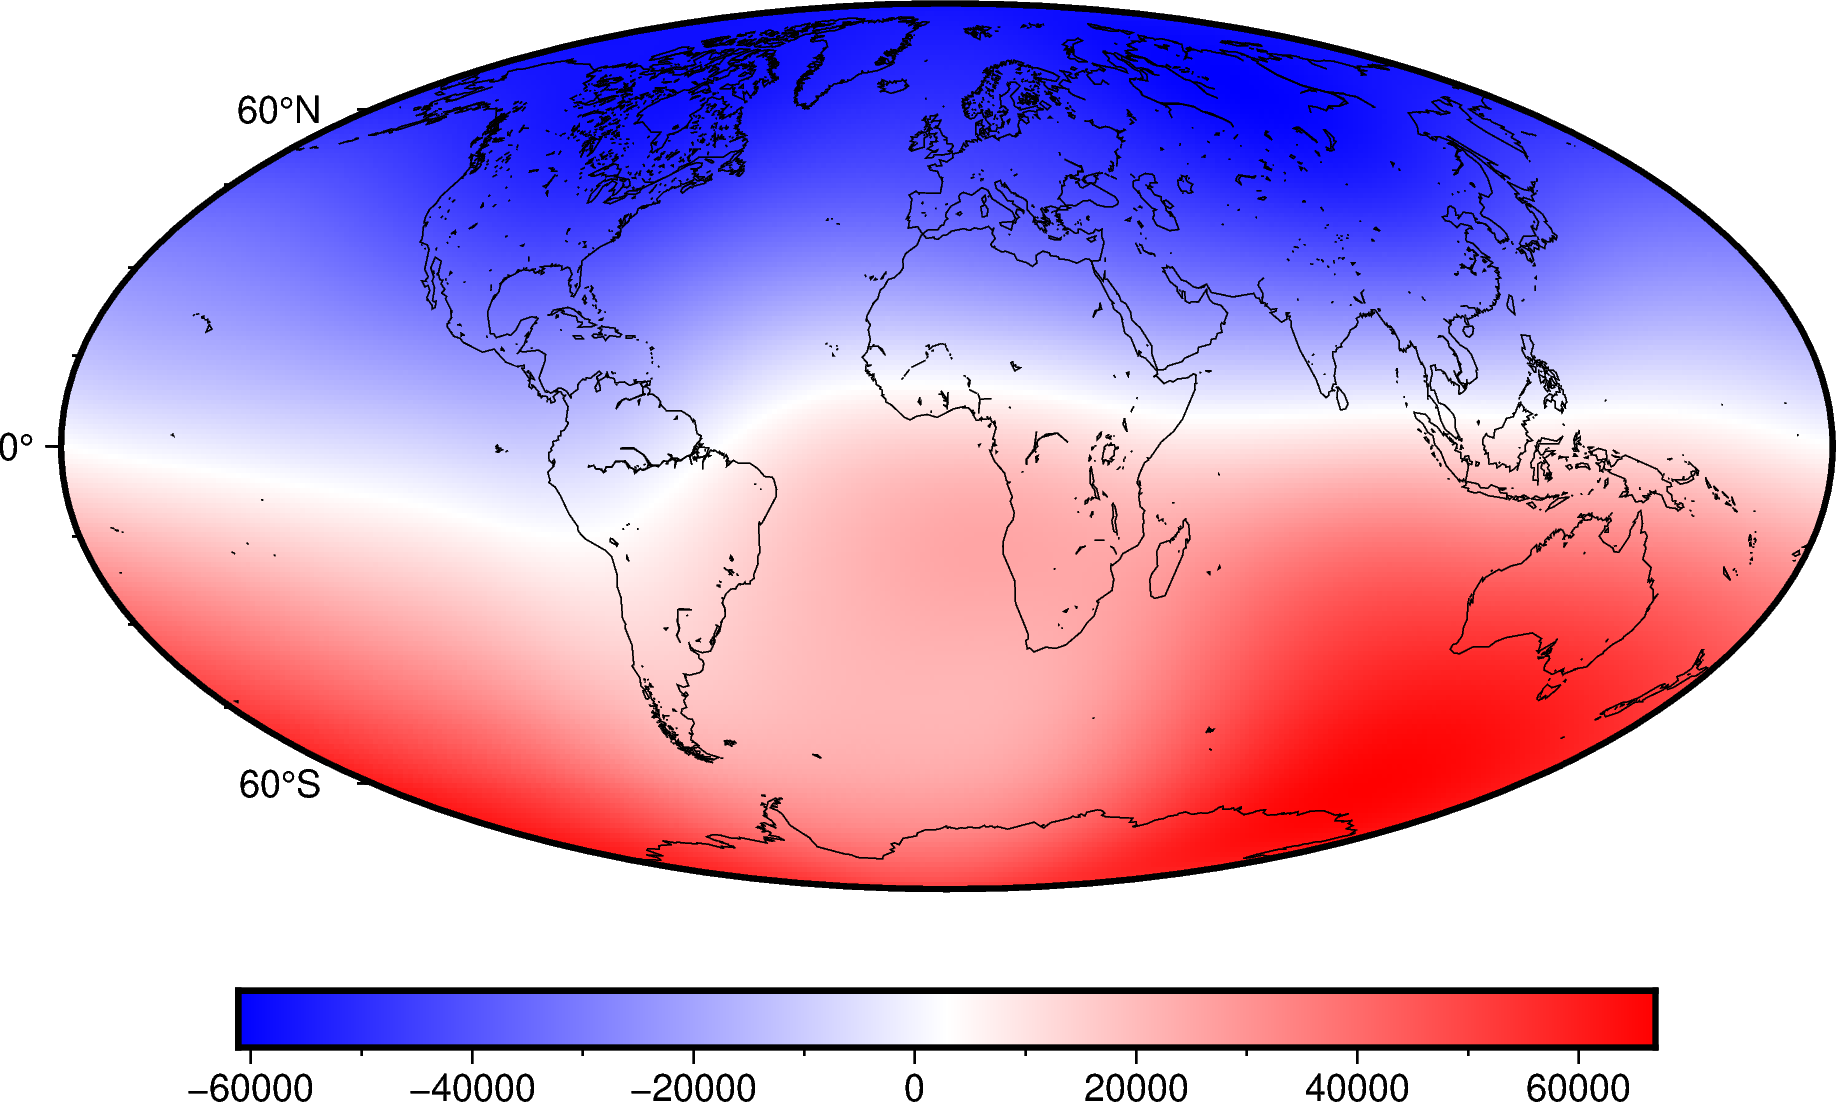

In [ ]:
grid = vd.make_xarray_grid((longitude, latitude), bz[len(bz)-1][0], data_names="bz")
grid
fig = pygmt.Figure()
fig.grdimage(grid.bz, cmap="polar+h", frame='af', projection="W15c")
fig.colorbar()
fig.coast(shorelines=True)
fig.show()

#Mapa de campo magnético absoluto - 2023

Text(0.5, 1.0, 'Campo magnético da Terra atualmente em módulo (nT)')

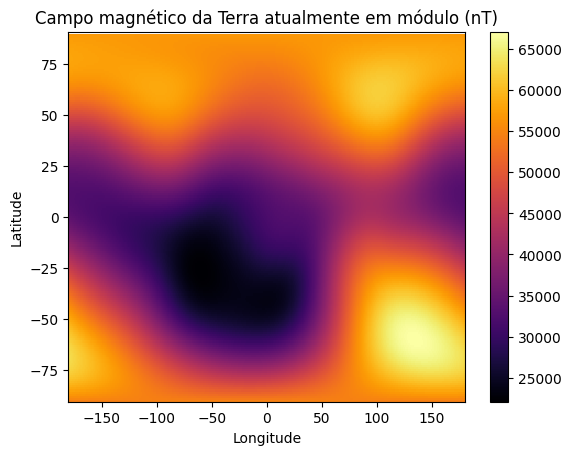

In [ ]:
plt.pcolormesh(longitude, latitude, B[len(B)-1], cmap="inferno")
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Campo magnético da Terra atualmente em módulo (nT)")

#Mapa de inclinação magnética - 2023

Text(0.5, 1.0, 'Inclinação do campo magnético da Terra atualmente(rad)')

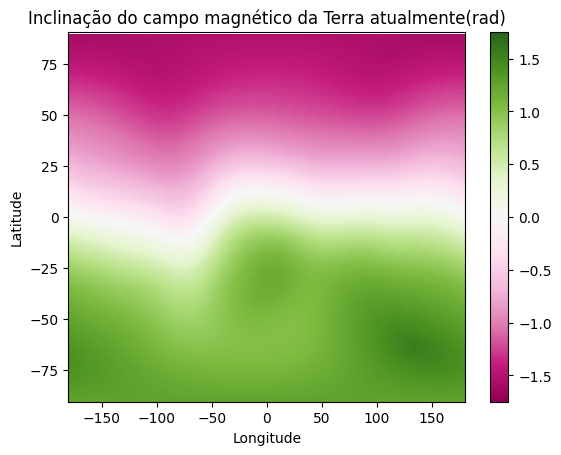

In [ ]:
plt.pcolormesh(longitude, latitude, I[len(I)-1], cmap="PiYG", vmax=1.75, vmin=-1.75)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Inclinação do campo magnético da Terra atualmente(rad)")


#Mapa de declinação magnética - 2023

Text(0.5, 1.0, 'Declinação do campo magnético da Terra atualmente (radianos)')

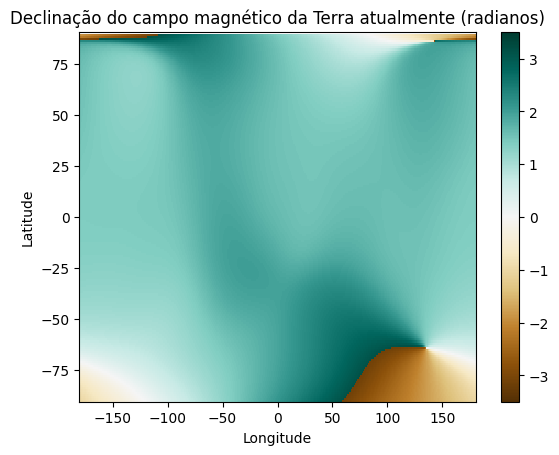

In [ ]:
plt.pcolormesh(longitude, latitude, D[len(D)-1], cmap="BrBG", vmax=3.5, vmin=-3.5)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Declinação do campo magnético da Terra atualmente (radianos)")

#Mapas de campo magnético em X de 1968 a 2023

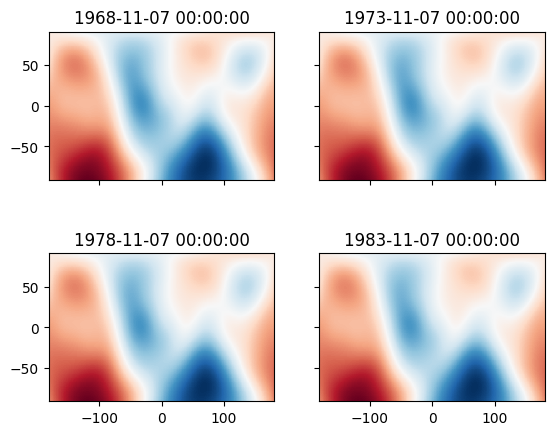

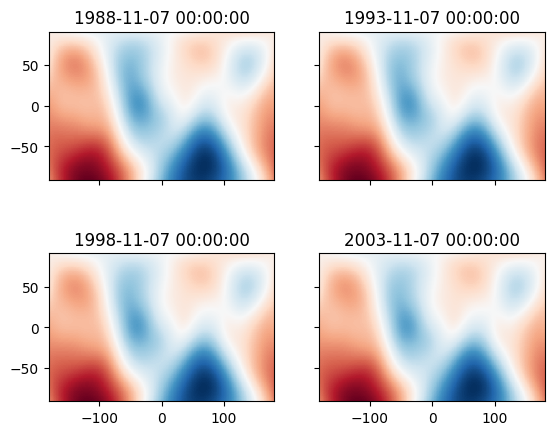

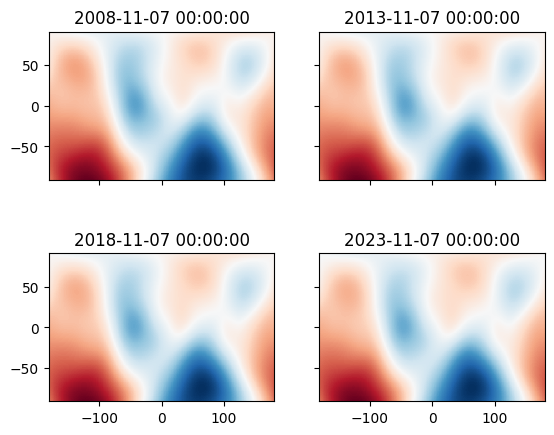

In [ ]:
def plot_Bx(k):
    fig,figure = plt.subplots(2,2, sharex=True, sharey=True)
    plt.subplots_adjust(hspace = 0.5)


    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, bx[k][0], cmap="RdBu_r")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(D),4):
    plot_Bx(k)

#Mapa de campo magnético em Y de 1968 a 2023

In [ ]:
def plot_By(k):
    fig,figure = plt.subplots(2,2)
    plt.subplots_adjust(hspace = 0.5)

    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, by[k][0], cmap="RdBu_r")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(D),4):
    plot_By(k)

#Mapa de campo magnético em Z de 1968 a 2023



In [ ]:
def plot_Bz(k):
    fig,figure = plt.subplots(2,2)
    plt.subplots_adjust(hspace = 0.5)

    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, bz[k][0], cmap="RdBu_r")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(D),4):
    plot_Bz(k)

#Mapas de campo magnético absoluto de 1968 a 2023

In [ ]:
def plot_B(k):
    fig,figure = plt.subplots(2,2)
    plt.subplots_adjust(hspace = 0.5)

    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, B[k], cmap="inferno")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(D),4):
    plot_B(k)



#Mapa de declinação magnética de 1968 a 2023

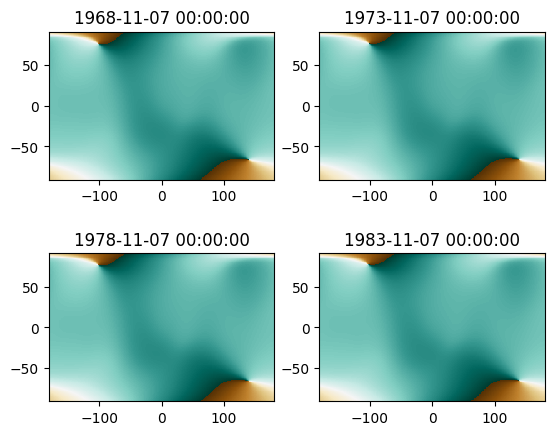

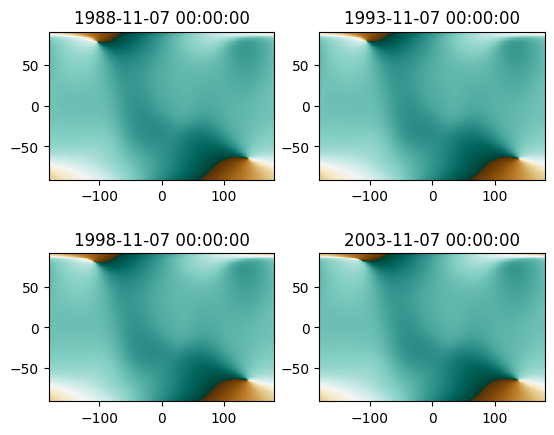

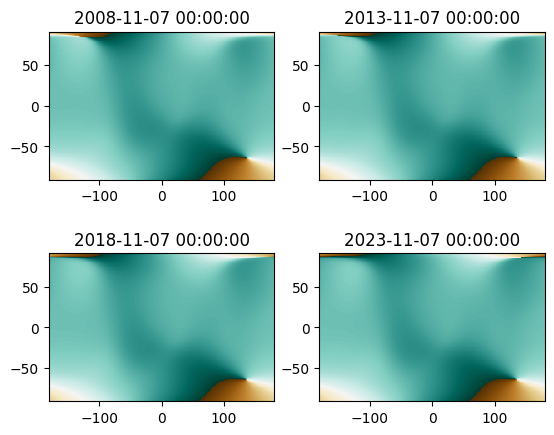

In [ ]:
def plot_D(k):
    fig,figure = plt.subplots(2,2)
    plt.subplots_adjust(hspace = 0.5)

    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, D[k], cmap="BrBG")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(D),4):
    plot_D(k)





#Mapa de inclinação magnética de 1968 a 2023

In [ ]:
def plot_I(k):
    fig,figure = plt.subplots(2,2)
    plt.subplots_adjust(hspace = 0.5)

    for i in range (2):
        for j in range(2):
            figure[i,j].pcolormesh(longitude, latitude, I[k], cmap="PiYG")
            year = dates[k]
            figure[i,j].set_title(year)
            k+=1
    plt.show()

for k in range(0,len(I),4):
    plot_I(k)



